In [27]:
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim 
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt 
from skimage.io import imread

In [28]:
!nvidia-smi

Sun Sep  8 20:09:57 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   39C    P8              2W /   20W |     851MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [29]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Aug_14_10:26:51_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.68
Build cuda_12.6.r12.6/compiler.34714021_0


In [30]:
print(torch.version.cuda)

11.8


In [31]:
# verify gpu 
print(torch.cuda.is_available())

True


In [32]:
dr = "../GAN/galaxies/"
batch_size = 128 
image_size = 256

In [33]:
data = dset.ImageFolder(root=dr,
                        transform=transforms.Compose([
                            transforms.Resize(image_size),
                            transforms.CenterCrop(image_size),
                            transforms.ToTensor(), 
                        ]))

In [34]:
# TODO: Add GPU as device
loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=2)
device = torch.device("cuda")

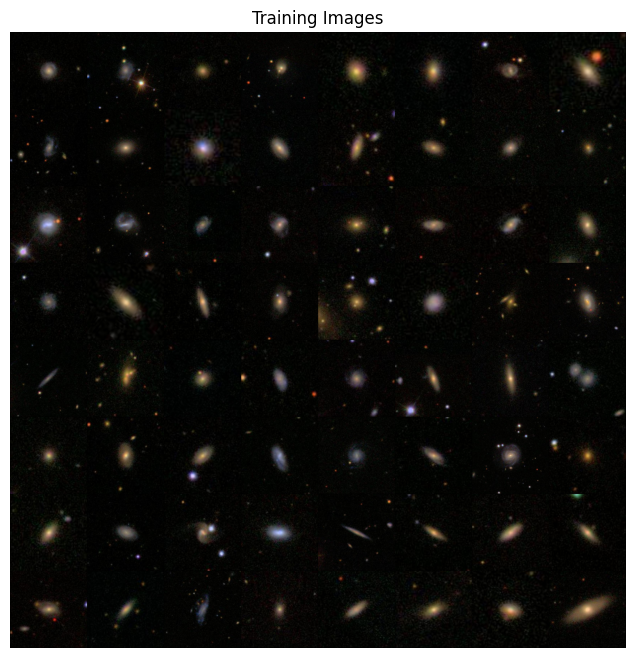

In [35]:
real_batch = next(iter(loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64]).cpu(),(1,2,0)))
plt.show()

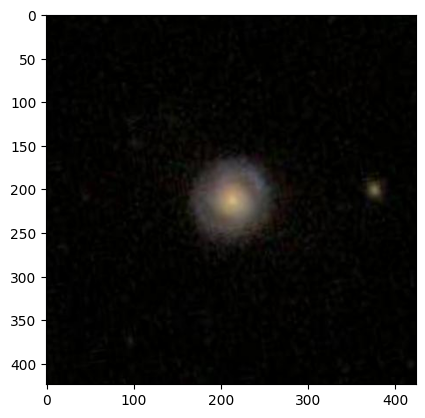

In [36]:
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:1]).cpu(),(1,2,0)))
plt.show()

In [ ]:
# BLENDER
# I'm basing this on the GAN paper (which used GalaxyZoo Images)
# What the paper did is that it took two batches of 128 images and made a third batch of 128 blended ones
# by stacking the galaxies of the first two 
def blend(b1, b2):
    

In [19]:
# Encoder Architecture (based on Autoencoding beyond pixels using a learned similarity metric)
# 5×5 64 conv. ↓, BNorm, ReLU
# 5×5 128 conv. ↓, BNorm, ReLU
# 5×5 256 conv. ↓, BNorm, ReLU
# 2048 fully-connected, BNorm, ReLU

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.main = nn.Sequential(

            # Layer 1 
            nn.Conv2d(3, 64, 5, 2, 2),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            # Layer 2 
            nn.Conv2d(64, 128, 5, 2, 2),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Layer 3
            nn.Conv2d(128, 256, 5, 2, 2),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            # Layer 4
            nn.Linear(256, 2048),
            nn.BatchNorm2d(2048), 
            nn.ReLU(),
        )

    def forward(self, input):
        return self.main(input)
            
        

In [ ]:
# Decoder Architecture (based on Autoencoding beyond pixels using a learned similarity metric)
# 8·8·256 fully-connected, BNorm, ReLU
# 5×5 256 conv. ↑, BNorm, ReLU
# 5×5 128 conv. ↑, BNorm, ReLU
# 5×5 32 conv. ↑, BNorm, ReLU
# 5×5 3 conv., tanh

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.start = nn.Sequential(
            # Layer 1 
            nn.Linear(2048, 8*8*256),
            nn.BatchNorm1d(256 * 8 * 8),
            nn.ReLU())

        self.main == nn.Sequential(
            # Layer 2
            nn.ConvTranspose2d(256, 128, 
        )


In [ ]:
# Discriminator Architecture (based on Autoencoding beyond pixels using a learned similarity metric)
# 5×5 32 conv., ReLU
# 5×5 128 conv. ↓, BNorm, ReLU
# 5×5 256 conv. ↓, BNorm, ReLU
# 5×5 256 conv. ↓, BNorm, ReLU
# 512 fully-connected, BNorm, ReLU
# 1 fully-connected, sigmoid
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()


    

In [ ]:
# train the neural net (for now just generating some galaxy images :))

In [ ]:
# evaluate results